In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re

In [2]:
data_dir = 'C:/Users/36205/Desktop/FUdball/nagydata'
import os
os.chdir(data_dir)

#PremierLeague data kinyerése az excel fájlból és formázása
epl = pd.read_excel(data_dir+"/all-euro-data-2021-2022.xlsx",sheet_name='E0')
epl = epl.drop(columns=['Referee'])
epl.drop(epl.iloc[:, 26:], inplace = True, axis = 1)
epl['Winner'] = ''
epl.loc[(epl['FTR'] == 'H'), 'Winner'] = epl['HomeTeam']  
epl.loc[(epl['FTR'] == 'D'), 'Winner'] = 'Draw'
epl.loc[(epl['FTR'] == 'A'), 'Winner'] = epl['AwayTeam'] 

#Bundesliga data kinyerése az excel fájlból és formázása
dbl = pd.read_excel(data_dir+"/all-euro-data-2021-2022.xlsx",sheet_name='D1')
dbl.drop(dbl.iloc[:, 26:], inplace = True, axis = 1)
dbl['Winner'] = ''
dbl.loc[(dbl['FTR'] == 'H'), 'Winner'] = dbl['HomeTeam']  
dbl.loc[(dbl['FTR'] == 'D'), 'Winner'] = 'Draw'
dbl.loc[(dbl['FTR'] == 'A'), 'Winner'] = dbl['AwayTeam'] 

#LaLiga data kinyerése az excel fájlból és formázása
spl = pd.read_excel(data_dir+"/all-euro-data-2021-2022.xlsx",sheet_name='SP1')
spl.drop(spl.iloc[:, 26:], inplace = True, axis = 1)
spl['Winner'] = ''
spl.loc[(spl['FTR'] == 'H'), 'Winner'] = spl['HomeTeam']  
spl.loc[(spl['FTR'] == 'D'), 'Winner'] = 'Draw'
spl.loc[(spl['FTR'] == 'A'), 'Winner'] = spl['AwayTeam'] 

#SeriaA data kinyerése az excel fájlból és formázása
isa = pd.read_excel(data_dir+"/all-euro-data-2021-2022.xlsx",sheet_name='I1')
isa.drop(isa.iloc[:, 26:], inplace = True, axis = 1)
isa['Winner'] = ''
isa.loc[(isa['FTR'] == 'H'), 'Winner'] = isa['HomeTeam']  
isa.loc[(isa['FTR'] == 'D'), 'Winner'] = 'Draw'
isa.loc[(isa['FTR'] == 'A'), 'Winner'] = isa['AwayTeam'] 

#Ligue1 data kinyerése az excel fájlból és formázása
fl1 = pd.read_excel(data_dir+"/all-euro-data-2021-2022.xlsx",sheet_name='F1')
fl1.drop(fl1.iloc[:, 26:], inplace = True, axis = 1)
fl1['Winner'] = ''
fl1.loc[(fl1['FTR'] == 'H'), 'Winner'] = fl1['HomeTeam']  
fl1.loc[(fl1['FTR'] == 'D'), 'Winner'] = 'Draw'
fl1.loc[(fl1['FTR'] == 'A'), 'Winner'] = fl1['AwayTeam'] 

In [3]:
eplTeamList = ['Aston Villa', 'Arsenal', 'Brentford', 'Brighton', 'Burnley', 
            'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Leeds',
            'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Norwich',
            'Southampton', 'Tottenham', 'Watford', 'West Ham', 'Wolves']

dblTeamList = ['Augsburg', 'Bayern Munich', 'Bielefeld', 'Bochum', 'Dortmund', 
            'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Greuther Furth', 'Hertha',
            'Hoffenheim', 'Leverkusen', "M'gladbach", 'Mainz', 'RB Leipzig',
            'Stuttgart', 'Union Berlin', 'Wolfsburg']

splTeamList = ['Alaves', 'Ath Bilbao', 'Ath Madrid', 'Barcelona', 'Betis', 
            'Cadiz', 'Celta', 'Elche', 'Espanol', 'Getafe',
            'Granada', 'Levante', 'Mallorca', 'Osasuna', 'Real Madrid',
            'Sevilla', 'Sociedad', 'Valencia', 'Vallecano', 'Villarreal']

isaTeamList = ['Atalanta', 'Bologna', 'Cagliari', 'Empoli', 'Fiorentina', 
            'Genoa', 'Inter', 'Juventus', 'Lazio', 'Milan',
            'Napoli', 'Roma', 'Salernitana', 'Sampdoria', 'Sassuolo',
            'Spezia', 'Torino', 'Udinese', 'Venezia', 'Verona']

fl1TeamList = ['Angers', 'Brest', 'Bordeaux', 'Clermont', 'Lens', 
            'Lille', 'Lorient', 'Lyon', 'Marseille', 'Metz',
            'Monaco', 'Montpellier', 'Nantes', 'Nice', 'Paris SG',
            'Reims', 'Rennes', 'St Etienne', 'Strasbourg', 'Troyes']

In [4]:
def team_tablestats(team,league):

    HomeGames = league.loc[(league['HomeTeam'] == team)]
    AwayGames = league.loc[(league['AwayTeam'] == team)]

    HMP = len(HomeGames)
    AMP = len(AwayGames)
    MP = HMP + AMP

    HW = len(HomeGames.loc[ HomeGames['Winner'] == team])
    HD = len(HomeGames.loc[ HomeGames['Winner'] == 'Draw'])
    HL = len(HomeGames.loc[ (HomeGames['Winner'] != team)  &  (HomeGames['Winner'] != 'Draw') ])

    AW = len(AwayGames.loc[ AwayGames['Winner'] == team])
    AD = len(AwayGames.loc[ AwayGames['Winner'] == 'Draw'])
    AL = len(AwayGames.loc[ (AwayGames['Winner'] != team)  &  (AwayGames['Winner'] != 'Draw') ])

    W = HW + AW
    D = HD + AD
    L = HL + AL
                        
    HGF = HomeGames['FTHG'].sum()
    AGF = AwayGames['FTAG'].sum()
    GF = HGF + AGF

    HGA = HomeGames['FTAG'].sum()
    AGA = AwayGames['FTHG'].sum()
    GA = HGA + AGA

    HGD = HGF - HGA 
    AGD = AGF - AGA
    GD = GF - GA

    HPts = HW * 3 + HD
    APts = AW * 3 + AD
    Pts  = HPts + APts
    
    teamdata = [team,MP,W,D,L,GF,GA,GD,Pts]    
    return teamdata




def generateTable(teamList,league):
    tableHead = pd.DataFrame(columns=['Club','MP','W','D','L','GF','GA','GD','Pts'])
    for i in teamList:
        tableHead.loc[(len(tableHead.index))] = team_tablestats(i,league)
    return tableHead

In [5]:
#PremierLeagueTable
eplTable = generateTable(eplTeamList, epl)
eplTable = eplTable.sort_values(by = ['Pts','GD','GF'], ascending=[0,0,0])

#Ligue1Table
fl1Table = generateTable(fl1TeamList, fl1)
fl1Table = fl1Table.sort_values(by = ['Pts','GD','GF'], ascending=[0,0,0])

#BundesligaTable
dblTable = generateTable(dblTeamList, dbl)
dblTable = dblTable.sort_values(by = ['Pts','GD','GF'], ascending=[0,0,0])

#LaLigaTable
splTable = generateTable(splTeamList, spl)
splTable = splTable.sort_values(by = ['Pts'], ascending=[0])

#SeariaATable
isaTable = generateTable(isaTeamList, isa)
isaTable = isaTable.sort_values(by = ['Pts'], ascending=[0])

In [12]:
def team_stats(team,league):
    
    HomeGames = league.loc[(league['HomeTeam'] == team)]
    AwayGames = league.loc[(league['AwayTeam'] == team)]
    
    HomeMatchPlayed = len(HomeGames)
    AwayMatchPlayed = len(AwayGames)
    AllMatchPlayed = HomeMatchPlayed + AwayMatchPlayed
    
    HomeCorners = HomeGames['HC'].sum()
    HomeCornersAvg = (HomeCorners / HomeMatchPlayed).round(2)
    HomeDescribe = HomeGames['HC'].describe()
    HomeDatas = HomeDescribe[-7:]
    HomeDatas = [round(num, 3) for num in HomeDatas]
    
    AwayCorners = AwayGames['AC'].sum()
    AwayCornersAvg = (AwayCorners / AwayMatchPlayed).round(2)
    AwayDescribe = AwayGames['AC'].describe()
    AwayDatas = AwayDescribe[-7:]
    AwayDatas = [round(num, 3) for num in AwayDatas]
    
    AllCorners = HomeCorners +  AwayCorners
    AllCornersAvg = (AllCorners / AllMatchPlayed).round(2)
    AllCornersArray = HomeGames['HC'].append(AwayGames['AC'])
    AllDescribe = AllCornersArray.describe()
    AllDatas = AllDescribe[-7:]
    AllDatas = [round(num, 3) for num in AllDatas]
    
    #print('HC:',HomeCorners,'HCAVG:',HomeCornersAvg,'\nAC:',AwayCorners,'ACAVG:',AwayCornersAvg,'\nCAVG:',AllCornersAvg)
    #print(HomeDatas,AwayDatas,AllDatas)
    #print(HomeDescribe,'\n',AwayDescribe,'\nCAVG',AllCornersAvg)
    return(HomeDatas,AwayDatas,AllDatas)

In [13]:
lista = team_stats('Barcelona',spl)
lista

([6.643, 2.898, 3.0, 5.0, 5.5, 9.0, 12.0],
 [4.733, 2.576, 1.0, 3.0, 5.0, 6.0, 10.0],
 [5.655, 2.857, 1.0, 3.0, 5.0, 7.0, 12.0])

In [14]:
team_stats('Real Madrid',spl)

([6.267, 3.515, 0.0, 3.5, 7.0, 8.0, 13.0],
 [5.267, 2.434, 0.0, 4.0, 5.0, 6.5, 9.0],
 [5.767, 3.014, 0.0, 4.0, 6.0, 7.0, 13.0])

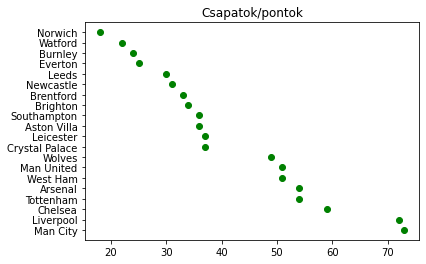

In [9]:
x = np.arange(len(eplTable['Pts']))
y = np.array(eplTable['Pts'])
ya =np.array(eplTable['Pts'])
z = np.array(eplTable['Club'])

#z = np.sort(df)

plt.title("Csapatok/pontok")

plt.scatter(y,z, color="green")
plt.show()

In [10]:
#kigyűjtöttem a nyertes oddsokat
epl['WOdds'] = ''
epl.loc[(epl['FTR'] == 'H'), 'WOdds'] = epl['B365H'].astype('float')
epl.loc[(epl['FTR'] == 'D'), 'WOdds'] = epl['B365D'].astype('float')
epl.loc[(epl['FTR'] == 'A'), 'WOdds'] = epl['B365A'].astype('float')
epl = epl.astype({'WOdds':'float'})
epl

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AC,HY,AY,HR,AR,B365H,B365D,B365A,Winner,WOdds
0,E0,2021-08-13,20:00:00,Brentford,Arsenal,2,0,H,1,0,...,5,0,0,0,0,4.00,3.40,1.95,Brentford,4.00
1,E0,2021-08-14,12:30:00,Man United,Leeds,5,1,H,1,0,...,4,1,2,0,0,1.53,4.50,5.75,Man United,1.53
2,E0,2021-08-14,15:00:00,Burnley,Brighton,1,2,A,1,0,...,6,2,1,0,0,3.10,3.10,2.45,Brighton,2.45
3,E0,2021-08-14,15:00:00,Chelsea,Crystal Palace,3,0,H,2,0,...,2,0,0,0,0,1.25,5.75,13.00,Chelsea,1.25
4,E0,2021-08-14,15:00:00,Everton,Southampton,3,1,H,0,1,...,8,2,0,0,0,1.90,3.50,4.00,Everton,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,E0,2022-04-02,17:30:00,Man United,Leicester,1,1,D,0,0,...,5,2,2,0,0,1.50,4.50,6.00,Draw,4.50
295,E0,2022-04-03,14:00:00,West Ham,Everton,2,1,H,1,0,...,4,1,1,0,1,1.75,3.80,4.50,West Ham,1.75
296,E0,2022-04-03,16:30:00,Tottenham,Newcastle,5,1,H,1,1,...,3,2,3,0,0,1.50,4.33,6.50,Tottenham,1.50
297,E0,2022-04-04,20:00:00,Crystal Palace,Arsenal,3,0,H,2,0,...,2,0,2,0,0,4.00,3.40,1.95,Crystal Palace,4.00


In [11]:
##Szabályok bizonyos ligákban pontazonosság esetén

# Premier League
# -Goal difference
# -Higher number of goals scored

# Ligue 1
# -Goal difference
# -Higher number of goals scored

# Bundesliga
# -Goal difference
# -Goals scored for the entire season
# -Head-to-head results (total points accumulated)
# -Head-to-head goals scored
# -Head-to-head away goals scored
# -Total away goals scored for the entire season

# La Liga
# -Head-to-head points between tied teams
# -Head-to-head goal difference between tied teams
# -Goal difference

# Serie A
# -Head-to-head points
# -Head-to-head goal difference
# -Goal difference
# -Higher number of goals scored

##Jelentések

# Div = League Division
# Date = Match Date (dd/mm/yy)
# HomeTeam = Home Team
# AwayTeam = Away Team
# FTHG = Full Time Home Team Goals
# FTAG = Full Time Away Team Goals
# FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
# HTHG = Half Time Home Team Goals
# HTAG = Half Time Away Team Goals
# HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

# HS = Home Team Shots
# AS = Away Team Shots
# HST = Home Team Shots on Target
# AST = Away Team Shots on Target
# HC = Home Team Corners
# AC = Away Team Corners
# HF = Home Team Fouls Committed
# AF = Away Team Fouls Committed
# HY = Home Team Yellow Cards
# AY = Away Team Yellow Cards
# HR = Home Team Red Cards
# AR = Away Team Red Cards

# B365H = Bet365 home win odds
# B365D = Bet365 draw odds
# B365A = Bet365 away win odds